O objetivo desse notebook é a previsão de performance de um estudante no exame de matemática a partir de suas informações socioeconomicas e demográficas.

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Leitura dos dados
db = pd.read_csv('StudentsPerformance.csv')

In [5]:
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [25]:
#Features
X = db.drop(['math score'], axis=1)

In [26]:
#Target
y = db['math score']

In [27]:
#Transformação de variáveis categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['test preparation course'] = le.fit_transform(X['test preparation course'])
X['gender'] = le.fit_transform(X['gender'])
X['race/ethnicity'] = le.fit_transform(X['race/ethnicity'])
X['parental level of education'] = le.fit_transform(X['parental level of education'])
X['lunch'] = le.fit_transform(X['lunch'])

In [6]:
#Escalonamento de valores para melhorar o modelo
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#X = ss.fit_transform(X)

In [28]:
#Escalonamento de valores para melhorar o modelo > Robust Scaler para evitar outliers
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X = rs.fit_transform(X)

In [29]:
#Divisão de dados em treino e testes
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [31]:
#Modelo utilizado Regressão de Arvores Aleatórias
from sklearn.ensemble import RandomForestRegressor

In [32]:
RF = RandomForestRegressor()

In [33]:
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
#Previsão
RFpred = RF.predict(X_test)

In [44]:
#Avaliação do modelo.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
#Avaliação nos dados de treino e de teste, leve overfitting.
lineX = [RF.score(X_train, y_train), RF.score(X_test, y_test)]
lineX
#Os dados estão melhores no conjunto de dados de treino.

[0.976735175279513, 0.8212373968815376]

In [156]:
#Avaliação das métricas de regressão
MSE = mean_squared_error(y_test,RFpred,squared = True)
MAE = mean_absolute_error(y_test,RFpred)
RMSE = mean_squared_error(y_test,RFpred,squared = False)
R_squared = r2_score(y_test,RFpred)
print("MSE:", MSE)
print("MAE:", MAE)
print("RMSE:", RMSE)
print("R-squared:", R_squared)

MSE: 44.207351554545454
MAE: 5.319560606060606
RMSE: 6.648860921582392
R-squared: 0.8212373968815376


In [149]:
# Teste de melhor parametro max_depth para florestas aleatórias. (máxima profundidade da árvore)
RFdic = {}
for md in range(1,16):
    RFtest = RandomForestRegressor(max_depth=md)
    RFtest.fit(X_train, y_train)
    RFtestpred = RFtest.predict(X_test)
    RFdic[md] = [RFtest.score(X_train, y_train), RFtest.score(X_test, y_test)]
RFdic
#Baseado nos resultados observamos que a melhor profundidade para a árvore é 8 (melhor R2 no conjunto de teste)

{1: [0.4935965328512502, 0.5020889611768906],
 2: [0.6622606363164618, 0.6580093310382176],
 3: [0.7967433440829114, 0.7693362973219136],
 4: [0.8542706250877347, 0.8181812925163133],
 5: [0.8831301479086928, 0.8265237539635594],
 6: [0.9078703513725345, 0.8276918081447512],
 7: [0.9291730301294836, 0.8305017323464248],
 8: [0.9465451352762593, 0.8330827835290314],
 9: [0.959296655473622, 0.8303702573322387],
 10: [0.9680881961093445, 0.8263090450816559],
 11: [0.9727775666313145, 0.8274631115615004],
 12: [0.974340760736011, 0.830098169846575],
 13: [0.9758827364652563, 0.8249105740345114],
 14: [0.9771470245993877, 0.8251942012445896],
 15: [0.9758539886442971, 0.8265221025862965]}

In [140]:
RFdb = pd.DataFrame(data=RFdic)

In [141]:
RFdb.rename(index={ 0: 'treino', 1: 'teste'}, inplace=True)
RFdb = RFdb.T

Text(0, 0.5, 'R2 Score')

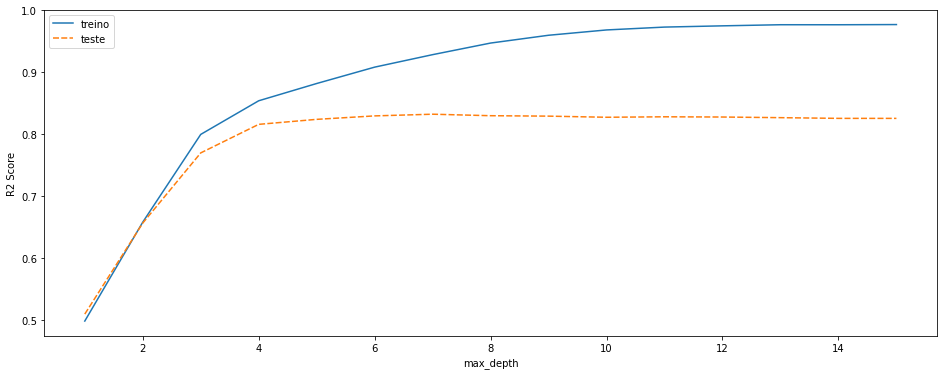

In [148]:
#Visualização da melhor profundidade
plt.figure(figsize=(16, 6))
sns.lineplot(data = RFdb)
plt.xlabel('max_depth')
plt.ylabel('R2 Score')